In [1]:
import numpy as np#MATEMATİK,VECTÖRLER,TÜREV,İNTREGRAL,DİFERANSİYEL DENKLEMLER,İSTATİSTİK
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('Crop_recommendation.csv')

In [3]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
df.sample()

,N,P,K,temperature,humidity,ph,rainfall,label
16,85,38,41,21.587118,82.788371,6.249051,276.655246,rice


In [6]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
df.shape

(2200, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [9]:
df.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


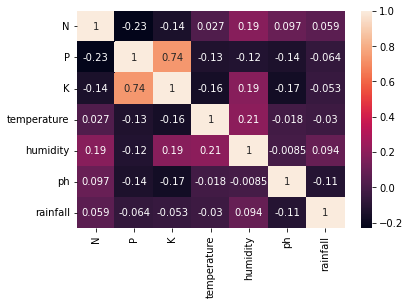

In [10]:
sns.heatmap(df.corr(),annot=True);#annot=True = grafiğin içindeki korelasyon kutucuklarına korelasyon değerlerini yazdırır
#korelasyon %100 çıkarsa veri farklı şekilde kendini tekrar etmiş olur.

In [11]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [12]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

Text(0.5, 1.0, 'labels')

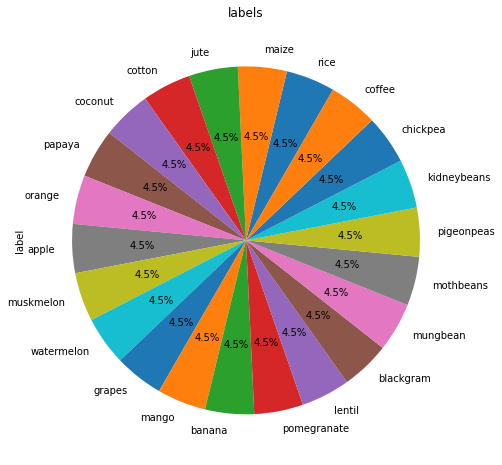

In [13]:
plt.figure(figsize=(8,8))
explode=(0.1,0.05,0.05)
df['label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=60)
plt.title('labels')

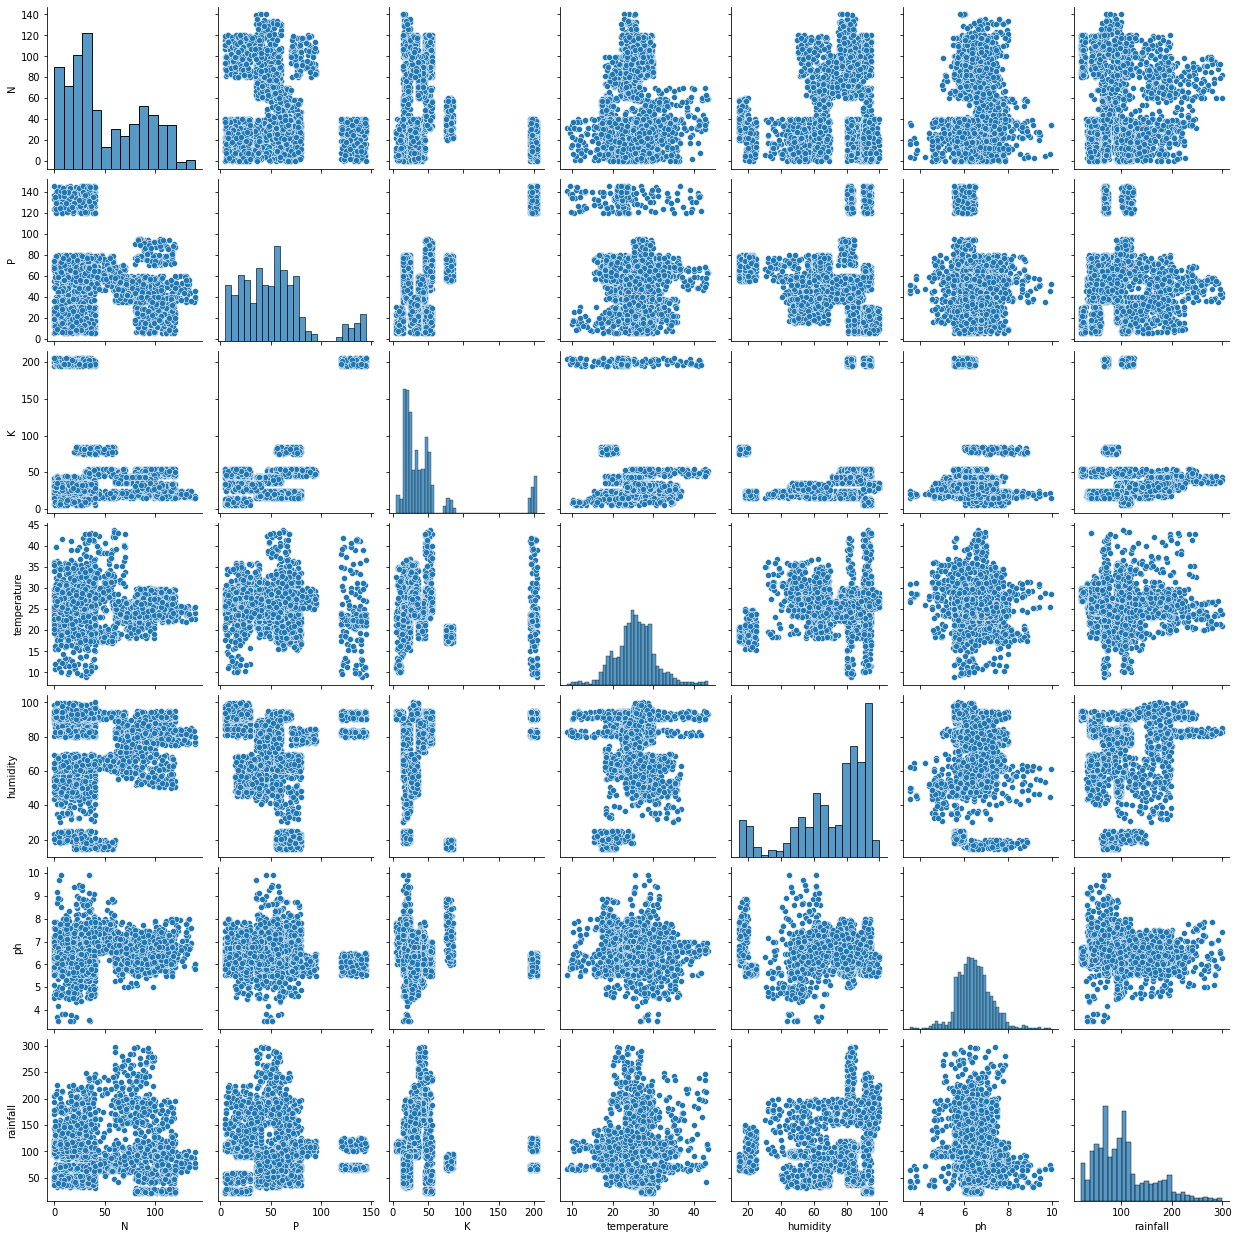

In [14]:
sns.pairplot(df)

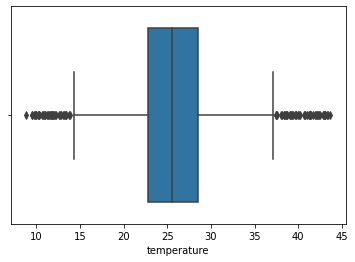

In [15]:
sns.boxplot(x=df['temperature'])

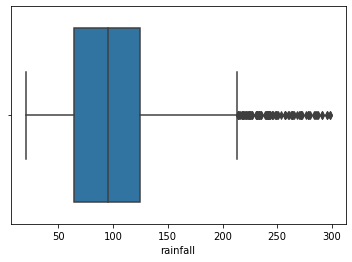

In [16]:
sns.boxplot(x=df['rainfall'])

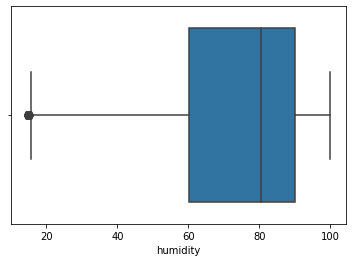

In [17]:
sns.boxplot(x=df['humidity'])

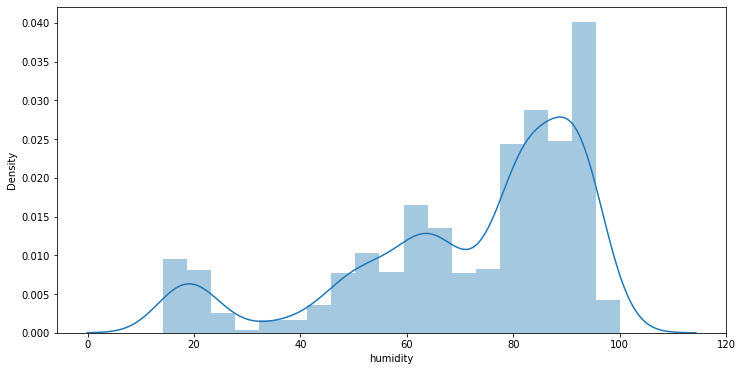

In [18]:
plt.figure(figsize=(12,6))
sns.distplot(df['humidity']); #dağılımına bakmak için 

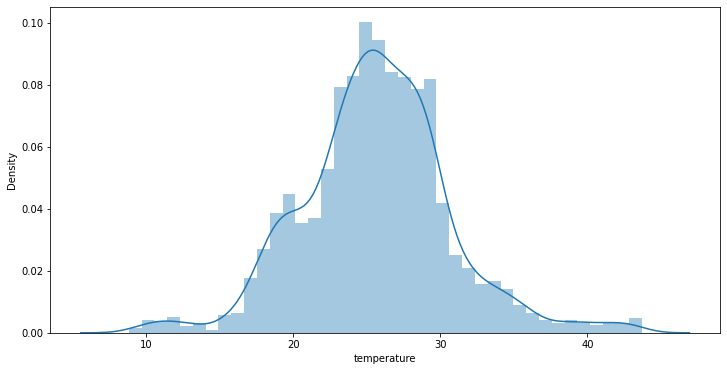

In [19]:
plt.figure(figsize=(12,6))
sns.distplot(df['temperature']); #dağılımına bakmak için 

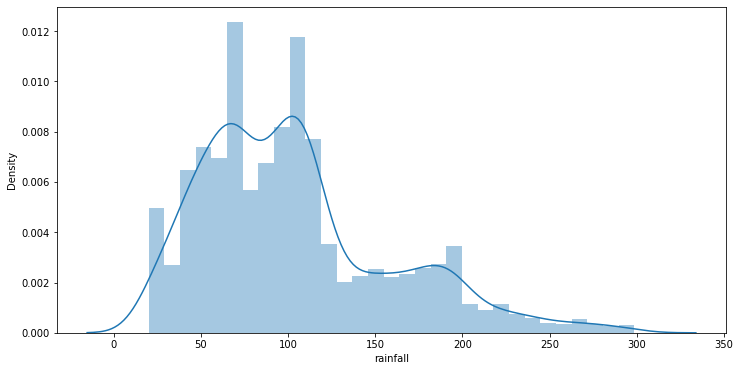

In [20]:
plt.figure(figsize=(12,6))
sns.distplot(df['rainfall']); #dağılımına bakmak için 

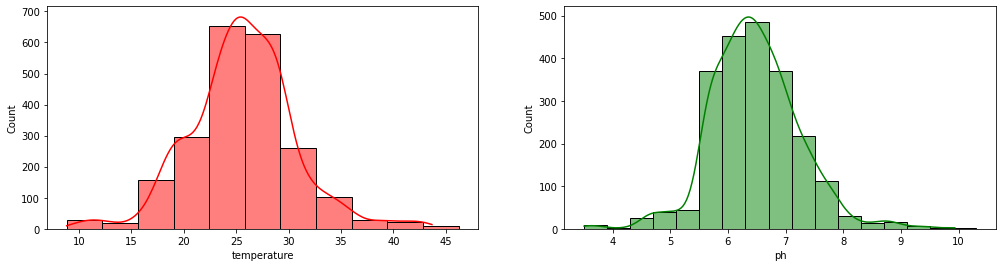

In [21]:
plt.figure(figsize=(17,9))
plt.subplot(2,2,1)
sns.histplot(df.temperature ,binwidth=3.4 , color="red" , kde={'alpha':0.5})
plt.subplot(2,2,2)
sns.histplot(df.ph ,binwidth=0.4 ,color = "green", kde={'alpha':0.5})
plt.show()

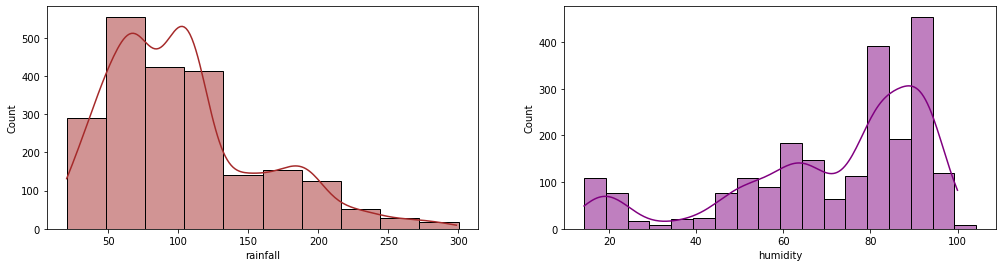

In [22]:
plt.figure(figsize=(17,9))
plt.subplot(2,2,1)
sns.histplot(df.rainfall ,  binwidth=28 ,color="brown" , kde={'alpha':0.5})
plt.subplot(2,2,2)
sns.histplot(df.humidity ,  binwidth=5 ,color="purple" , kde={'alpha':0.5})

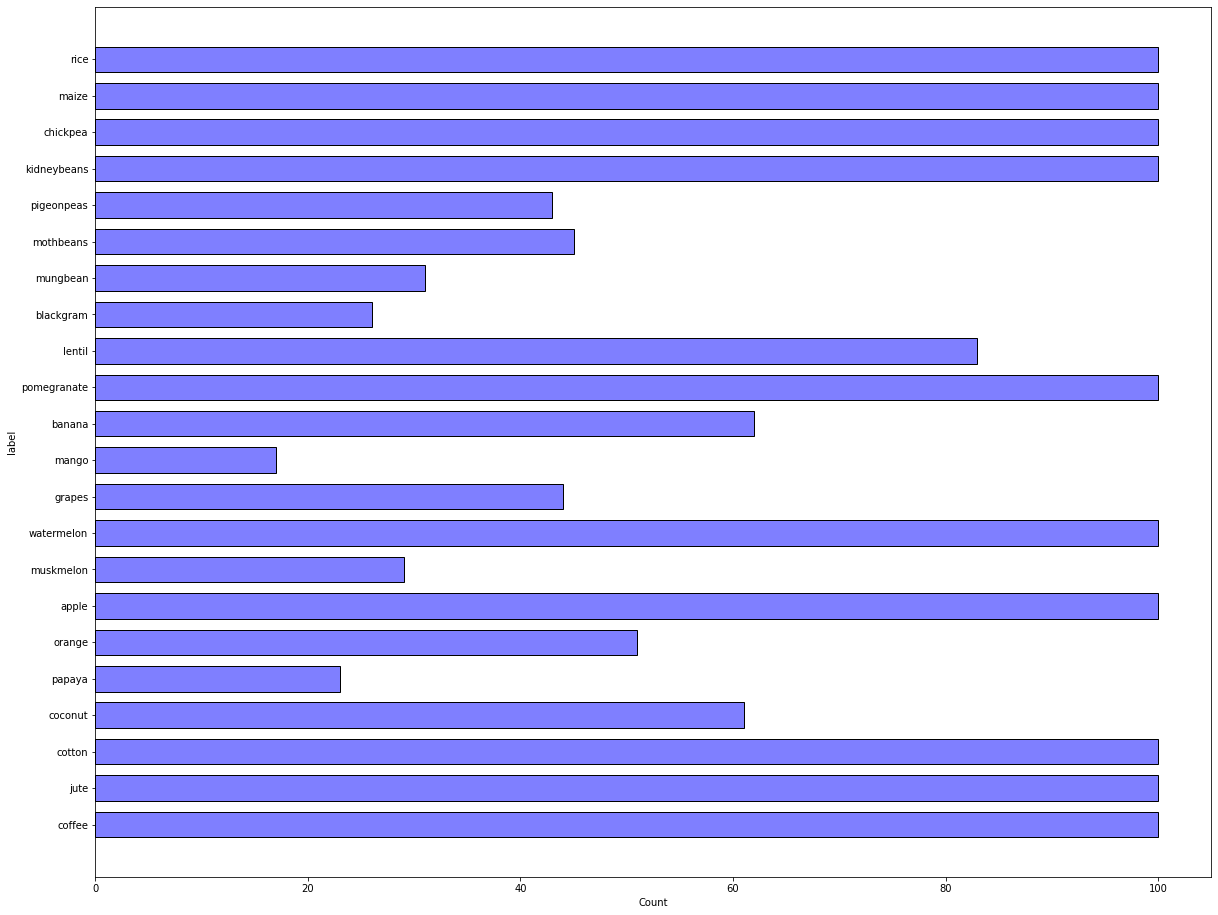

In [23]:
#Mango ağacının büyümesi için en uygun sıcaklıklar, sıcaklığın 30 - 32 °C olduğu zamanlar.
#ve 44 - 48°C arasındaki yüksek sıcaklıklara dayanabilir ve
# 18 santigrat derece veya daha düşük sıcaklıklarda mango ağaçları gibi ölürler
plt.figure(figsize=(20,16))
df_Median_Temperatures =df.query("temperature > 15  & temperature <= 28 ") 
sns.histplot(y=df_Median_Temperatures.label, shrink=.7 ,color="blue" , alpha=0.5 )

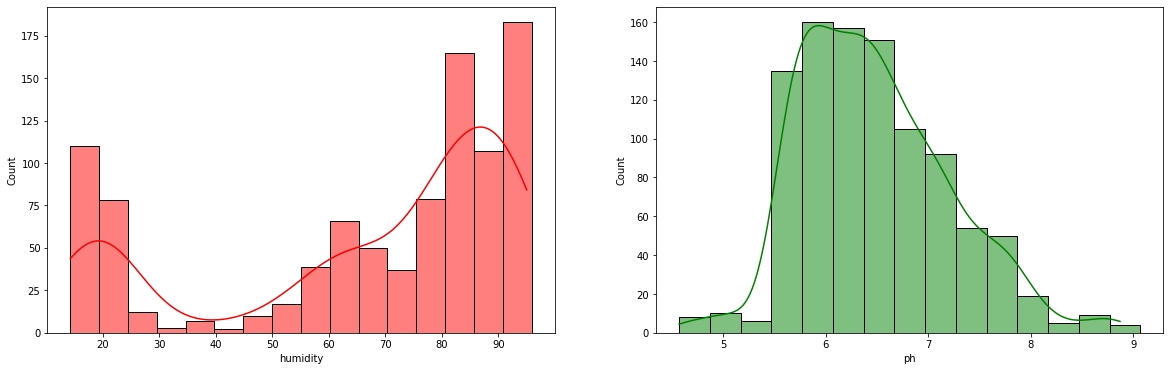

In [24]:
# Sıcaklık 20'nin üzerine çıktığında, nem seviyesi her arttığında,
# sürekli artırma zorunluluğu yoktur, düşürülebilir ancak %50'nin altına düşmez
#Çoğu bitki için optimum pH, bitkinin türüne bağlı olarak 5,5 ile 8 arasındadır.
plt.figure(figsize=(20,6))
df_Temperatures =df.query("temperature < 25 ") 
plt.subplot(1,2,1)
sns.histplot(df_Temperatures.humidity ,  binwidth=5.1 ,color="red" , kde={'alpha':0.5},)
plt.subplot(1,2,2)
sns.histplot(df_Temperatures.ph ,  binwidth=0.3 ,color="green" , kde={'alpha':0.5})
plt.show()

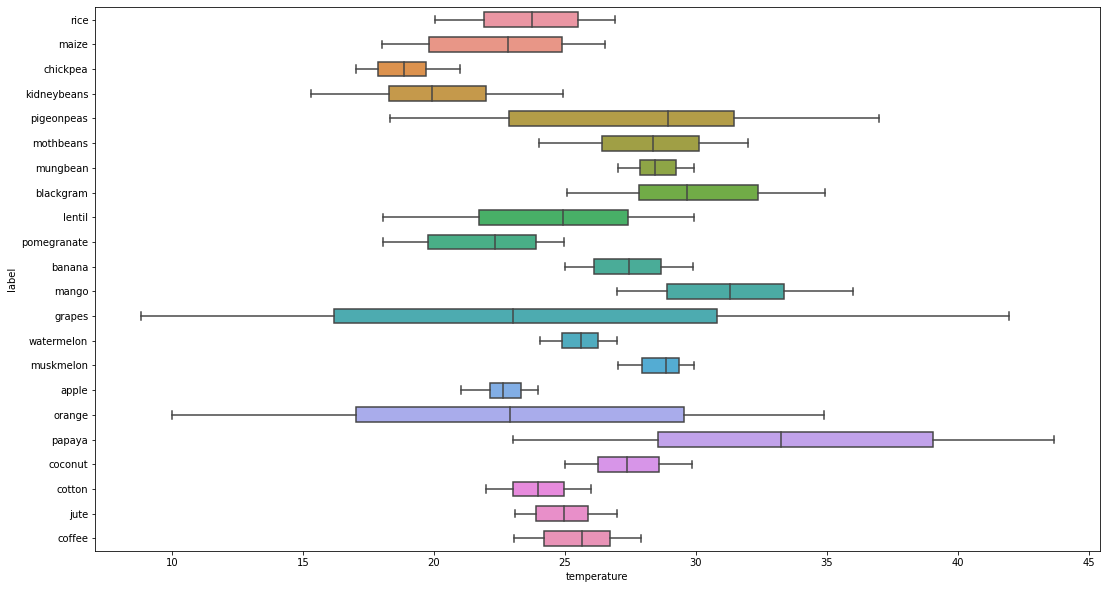

In [25]:
# Şekilde gösterildiği gibi, bitkiler yüksek veya düşük sıcaklıklara ihtiyaç duyar ve bu, bir bitkinin ne zaman ekileceğini belirlemede önemli bir noktadır.
plt.figure(figsize=(18,10))
sns.boxplot(x="temperature", y="label", data=df,
            whis=[0, 100], width=.6 , orient="h")
plt.show()

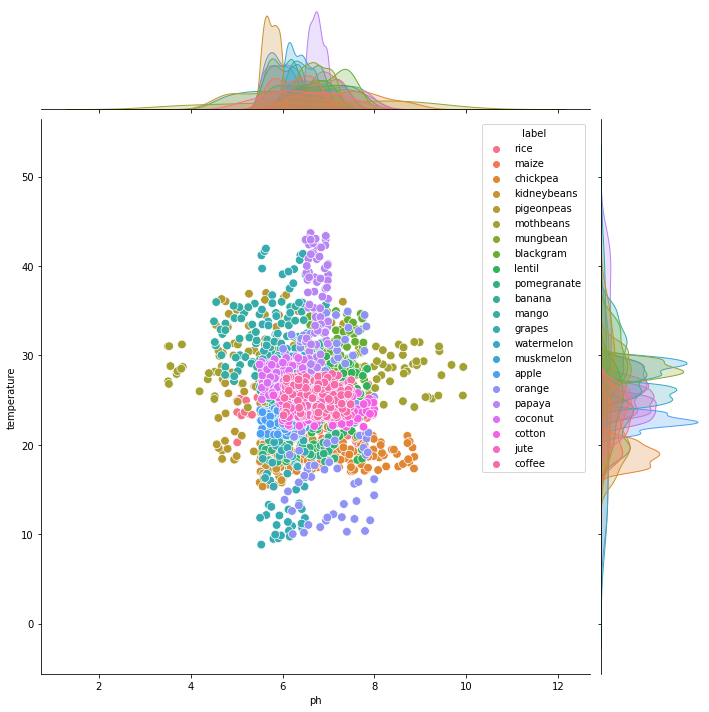

In [26]:
# Genel olarak, sıcaklık 21'in üzerine çıktığında pH düşer
# Çoğu bitki için optimum pH, bitkinin türüne bağlı olarak 5,5 ile 8 arasındadır.
sns.jointplot(data=df, x="ph", y="temperature" ,height=10 ,hue="label" , space=0.1 ,s=75 )
plt.show()

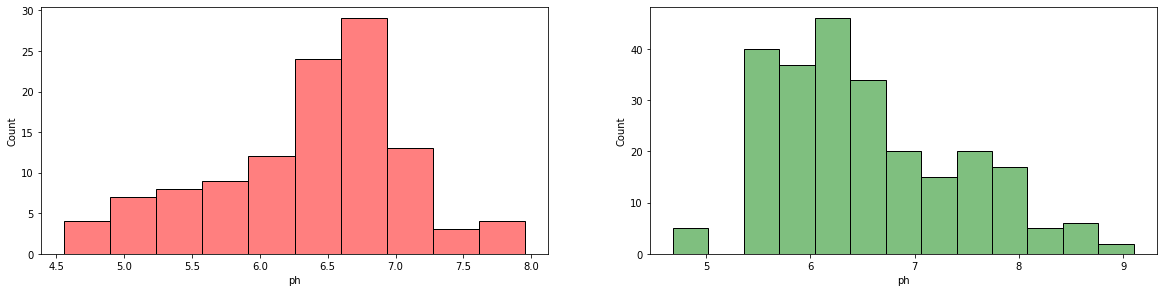

In [27]:
# Sıcaklık arttıkça pH düşer.
df_high_Temperatures =df.query("temperature > 34 ") 
df_low_Temperatures =df.query("temperature < 19.5 ") 
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.histplot(df_high_Temperatures.ph , binwidth=.34,color="red" ,alpha=0.5,)
plt.subplot(2,2,2)
sns.histplot(df_low_Temperatures.ph , binwidth=.34  ,color="green" ,alpha=0.5)
plt.show()

In [28]:
print( "Lowest pH value at low temperatures : " , df_low_Temperatures.ph.min())
print( "Lowest pH value at Highest temperatures : " , df_high_Temperatures.ph.min())
print("- -- -- --- --- -- --- ")
print( "Highest pH value at low temperatures : " , df_low_Temperatures.ph.max())
print( "Highest pH value at Highest temperatures : " , df_high_Temperatures.ph.max())
print("- -- -- --- --- -- --- ")
print( "Average pH value at low temperatures : " , df_low_Temperatures.ph.mean())
print( "Average pH value at Highest temperatures : " , df_high_Temperatures.ph.mean())

Lowest pH value at low temperatures :  4.681576043
Lowest pH value at Highest temperatures :  4.555688532
- -- -- --- --- -- --- 
Highest pH value at low temperatures :  8.868741443
Highest pH value at Highest temperatures :  7.786725333
- -- -- --- --- -- --- 
Average pH value at low temperatures :  6.540344889121456
Average pH value at Highest temperatures :  6.34890881899115


In [29]:
# Hangi ürünlerin sadece Yaz Mevsimi, Kış Mevsimi ve Yağışlı Mevsimlerde Yetiştirilebileceğini anlayalım
print("Summer dfs")
print(df[(df['temperature'] > 30) & (df['humidity'] > 50)]['label'].unique())
print("-----------------------------------")
print("Winter dfs")
print(df[(df['temperature'] < 20) & (df['humidity'] < 35)]['label'].unique())
print("-----------------------------------")
print("Rainy dfs")
print(df[(df['rainfall'] > 200) & (df['humidity'] > 30)]['label'].unique())

Summer dfs
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-----------------------------------
Winter dfs
['chickpea' 'kidneybeans' 'pigeonpeas']
-----------------------------------
Rainy dfs
['rice' 'papaya' 'coconut']


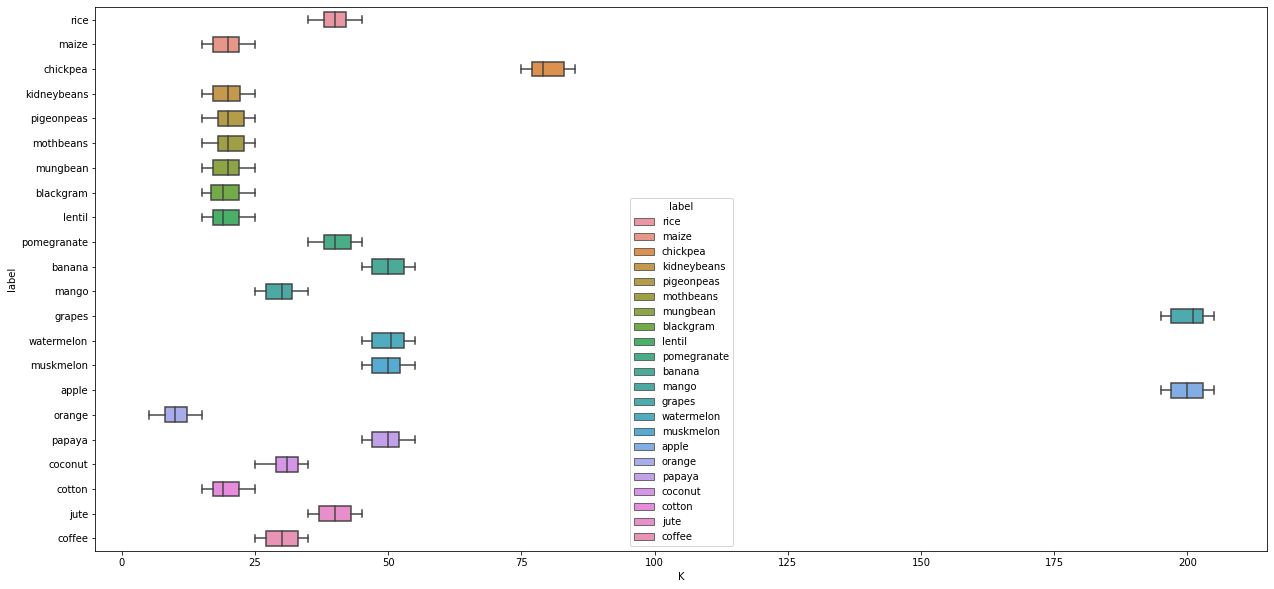

In [30]:
# Şekilde gösterildiği gibi, bitkiler yüksek veya düşük sıcaklıklara ihtiyaç duyar ve bu, bir bitkinin ne zaman ekileceğini belirlemede önemli bir noktadır.
plt.figure(figsize=(21,10))
sns.boxplot(x="K", y="label", data=df,
            whis=[0, 100], width=0.6
            , orient="h" ,  hue="label" , dodge=False)
plt.show()

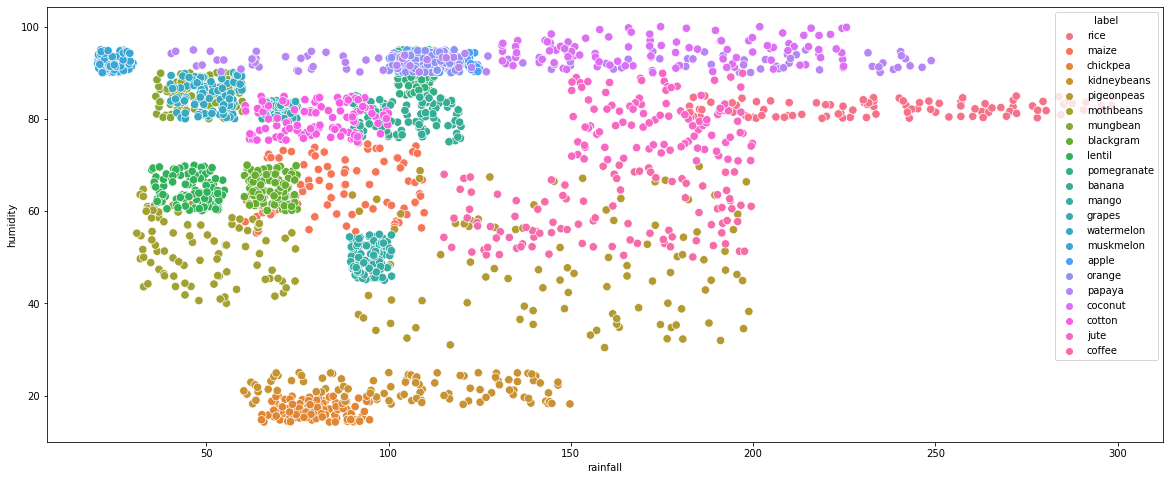

In [31]:
# Genel olarak yağış arttığında nem derecesi ile artar
plt.figure(figsize=(20,8))
sns.scatterplot(data=df, x="rainfall", y="humidity" , hue="label" ,s=70)
plt.show()

In [32]:
x = df.drop(['label'], axis = 1)
y = df['label']

In [33]:
from sklearn.model_selection import train_test_split ,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,shuffle = True, random_state = 0)

In [41]:
X_train.shape, X_test.shape#boyutuna bakar.
#1760 tanesini eğitiyor.
#440 tanesini test ediyor.

((1760, 7), (440, 7))

In [42]:
kn_classifier = KNeighborsClassifier()
kn_classifier.fit(xX_train,y_train)

KNeighborsClassifier()

In [43]:
y_pred=kn_classifier.predict(X_test)

In [44]:
pred_kn = kn_classifier.predict(X_test)

In [45]:
print('Training set score: {:.4f}'.format(kn_classifier.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(kn_classifier.score(X_test, y_test)))

Training set score: 0.9886
Test set score: 0.9773


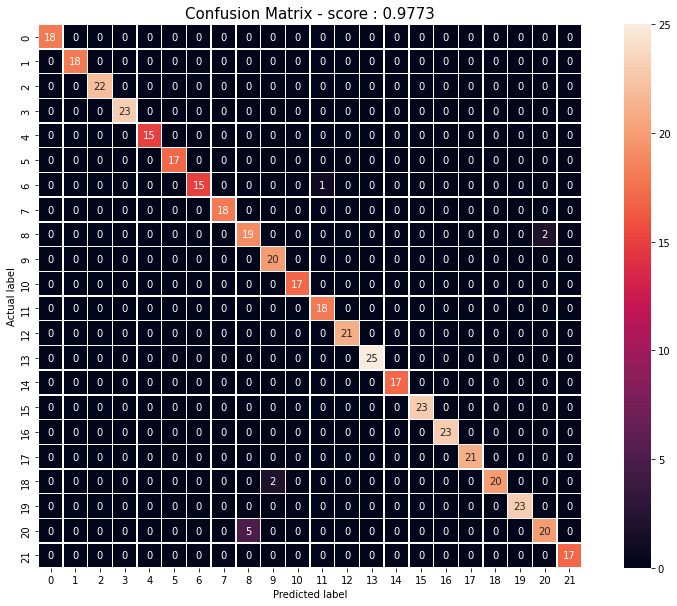

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score : {:.4f}'.format(kn_classifier.score(X_test, y_test))
plt.title(all_sample_title, size = 15);
plt.show()